<a href="https://colab.research.google.com/github/slmsshk/examples/blob/master/DS_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means Clustering on Personality test

In [38]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
# Loading Dataset
data=pd.read_csv('/content/drive/MyDrive/GC.csv')

In [ ]:
# Data preview
data.head()


In [34]:
# ds1=fdf[fdf['Batch']=='DS1'].drop(['Batch'],axis=1)
# ds2=fdf[fdf['Batch']=='DS2'].drop(['Batch'],axis=1)
# Drop unnecessary columns.
fdf=data.drop(['Score','Timestamp','Batch','Name'],axis=1)
# Store name in another var
nme=data['Name']
fdf.head()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest.,Seeing other people cry can easily make you feel like you want to cry too.,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure.","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know.",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,"When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.",You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.
0,4,3,1,2,3,4,3,3,2,4,...,2,4,2,4,2,3,4,2,4,2
1,1,3,1,5,2,5,2,3,4,3,...,3,4,2,3,3,3,2,3,4,5
2,4,5,3,5,4,3,5,4,5,1,...,3,3,4,3,3,3,4,2,4,2
3,3,4,3,4,4,3,4,3,4,1,...,3,3,3,4,4,3,4,3,3,4
4,5,4,1,4,1,3,5,2,3,5,...,3,5,1,1,2,4,4,3,5,5


In [58]:
# Dimension Reduction
pca = PCA(n_components=20) # it will transform the existing data set into new dimensioans called PCs
pca.fit(fdf) 
data_new = pca.transform(fdf)
print(data_new.shape)

(53, 20)


Text(0.5, 1.0, 'Scree plot')

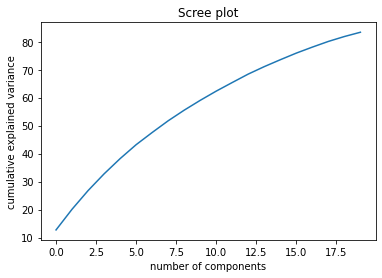

In [59]:
# Scree plot
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100) # cummilative variance
plt.plot(Variance_Explaied)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')

In [60]:
data_new

array([[ 3.61953227, -0.24785397, -1.20941004, ..., -2.07210024,
        -0.80599242,  1.04475064],
       [ 1.23976002,  0.1726045 ,  0.87270083, ..., -0.22134003,
        -0.17457976,  1.93626093],
       [-1.7009949 ,  2.00092447, -0.81366879, ..., -0.09382527,
         0.7024306 ,  0.84277857],
       ...,
       [-3.58643854, -1.28389637,  1.21813174, ...,  2.21064773,
         0.35291491,  0.52974667],
       [-2.28348043, -0.28432299, -0.56508013, ...,  0.86116065,
         2.3424231 , -1.17782755],
       [-1.04136852, -1.59511893, -1.46733702, ..., -0.79330221,
        -0.28924188,  0.97674217]])

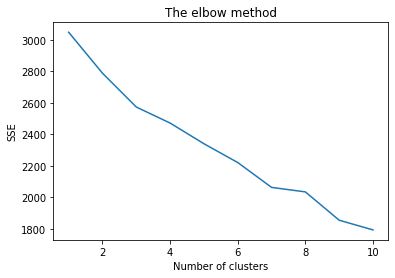

In [61]:
# Scree plot for k means
SSE =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_new)
    SSE.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

In [68]:
kmeans1 = KMeans(n_clusters=7)
d1 = kmeans1.fit_predict(data_new)

# ds1['Cluster'] = d1
# ds1

In [69]:
results=pd.DataFrame(nme)
results['Cluster']=d1
d1

array([1, 1, 1, 0, 6, 1, 5, 6, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 2, 5, 1,
       3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 4, 6, 0, 0, 1, 1, 5, 2, 2, 0, 0,
       0, 5, 5, 0, 6, 6, 5, 3, 0], dtype=int32)

In [ ]:
results.sort_values('Cluster')

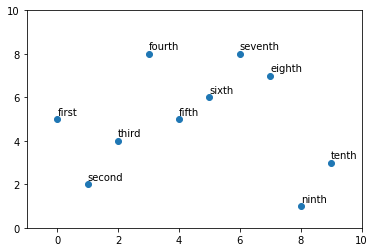

In [84]:
# Importing libraries
import matplotlib.pyplot as plt

# Preparing dataset
x = [x for x in range(10)]
y = [5, 2, 4, 8, 5, 6, 8, 7, 1, 3]
text = ["first", "second", "third", "fourth", "fifth",
		"sixth", "seventh", "eighth", "ninth", "tenth"]

# plotting scatter plot
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
	plt.annotate(text[i], (x[i], y[i] + 0.2))

# adjusting the scale of the axes
plt.xlim((-1, 10))
plt.ylim((0, 10))
plt.show()


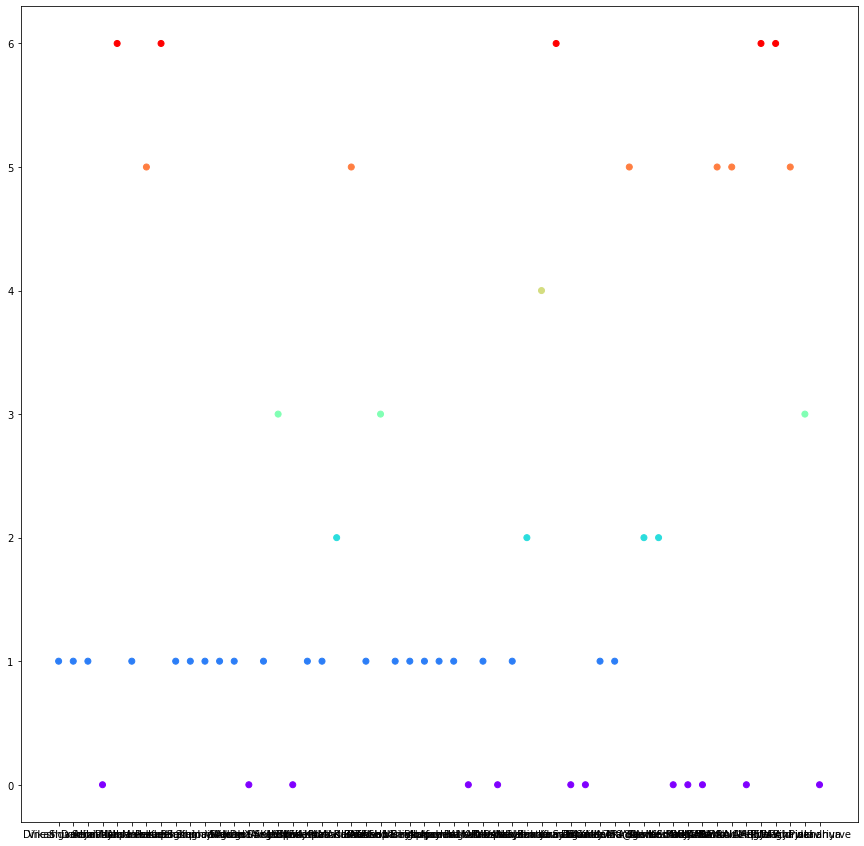

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(results.iloc[:, 0], results.iloc[:, 1], c=d1, cmap='rainbow')
# Loop for annotation of all points
# for i in range(len(nme)):
#     plt.annotate(results['Name'][i], (results['Name'][i],results['Cluster'][i]))
plt.savefig('ds1.png')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=4)
d2 = kmeans2.fit_predict(ds2.iloc[:,1:])
ds2['Cluster'] = d2

In [ ]:
df2=ds2['Name'],ds2['Cluster']
df2=DataFrame(df2)

In [ ]:
df2.T.sort_values(by='Cluster').set_index('Name')